In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time
import pandas as pd
import csv
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [2]:
# Selenium 웹 드라이버를 시작합니다. 
driver = webdriver.Chrome(service= Service(ChromeDriverManager().install()))  # 크롬 드라이버 경로를 설정하세요.

# Pubmed 검색 URL을 생성합니다.
base_url = "https://pubmed.ncbi.nlm.nih.gov/?term="
search_query = "Lung toxic chemical"  # 검색어를 원하는 키워드로 변경하세요.
search_url = base_url + search_query

# 1페이지부터 10페이지까지 반복합니다.
for page in range(1, 284):
    # 페이지 번호를 포함한 완전한 URL을 생성합니다.
    page_url = search_url + "&filter=years.2000-2023" + f"&page={page}"

    # 생성된 URL로 이동합니다.
    driver.get(page_url)

    # 페이지가 로드될 때까지 기다립니다. (필요에 따라 적절한 대기 시간을 설정해야 합니다)
    time.sleep(3)  # 2초 대기 (필요에 따라 조정)
    results = driver.find_elements(By.CSS_SELECTOR, ".docsum-title")

    with open("lung toxic chemical.csv", mode="a", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)

        # 논문 제목을 CSV 파일에 작성
        for result in results:
            writer.writerow([result.text])

# 작업이 끝나면 웹 드라이버를 종료합니다.
driver.quit()

In [15]:
data = pd.read_csv("/Users/csb/CSB_hanjin/ai/lung toxic chemical.csv",encoding='unicode_escape')
data

,Paper
0,Lung inflammation caused by inhaled toxicants:...
1,BMSC-derived exosomes ameliorate sulfur mustar...
2,Chemical warfare agents.
3,Lung deposition analyses of inhaled toxic aero...
4,Polydopamine nanoparticles for the treatment o...
...,...
2819,NTP Technical Report on the Toxicity Studies o...
2820,Clinical toxicology of exposures to chemicals ...
2821,Understanding the Early Biological Effects of ...
2822,Long-term post-acute sequelae of COVID-19 infe...


In [16]:
# 불용어 목록을 가져옵니다.
stop_words = set(stopwords.words('english'))  # 영어 불용어 목록을 사용하겠습니다.

# 데이터프레임의 각 셀에서 불용어를 제거합니다.
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

def remove_dot(text):
    return text.replace(',', '')

def remove_dot2(text):
    return text.replace('.', '')

def remove_dot3(text):
    return text.replace(':', '')

def remove_dot4(text):
    return text.replace('-', ' ')

def remove_dot5(text):
    return text.replace('"', '')

def remove_dot6(text):
    return text.replace('(', '')

def remove_dot7(text):
    return text.replace(')', '')

def remove_dot8(text):
    return text.replace('[', '')

def remove_dot9(text):
    return text.replace(']', '')

def remove_numbers(text):
    return ''.join([char for char in text if not char.isdigit()])

# 'text_column' 열의 각 셀에서 '.' 문자를 제거합니다.
data['Paper'] = data['Paper'].apply(remove_dot)
data['Paper'] = data['Paper'].apply(remove_dot2)
data['Paper'] = data['Paper'].apply(remove_dot3)
data['Paper'] = data['Paper'].apply(remove_dot4)
data['Paper'] = data['Paper'].apply(remove_dot5)
data['Paper'] = data['Paper'].apply(remove_dot6)
data['Paper'] = data['Paper'].apply(remove_dot7)
data['Paper'] = data['Paper'].apply(remove_dot8)
data['Paper'] = data['Paper'].apply(remove_dot9)
data['Paper'] = data['Paper'].apply(remove_numbers)

# 'text_column' 열의 각 셀에서 불용어를 제거합니다.
data['Paper'] = data['Paper'].apply(remove_stopwords)



# 결과 출력
print(data)

                                                  Paper
0     Lung inflammation caused inhaled toxicants review
1     BMSC derived exosomes ameliorate sulfur mustar...
2                               Chemical warfare agents
3     Lung deposition analyses inhaled toxic aerosol...
4     Polydopamine nanoparticles treatment acute inf...
...                                                 ...
2819  NTP Technical Report Toxicity Studies Trichlor...
2820  Clinical toxicology exposures chemicals clande...
2821  Understanding Early Biological Effects Isopren...
2822  Long term post acute sequelae COVID infection ...
2823  Abstracts rd International Genomic Medicine Co...

[2824 rows x 1 columns]


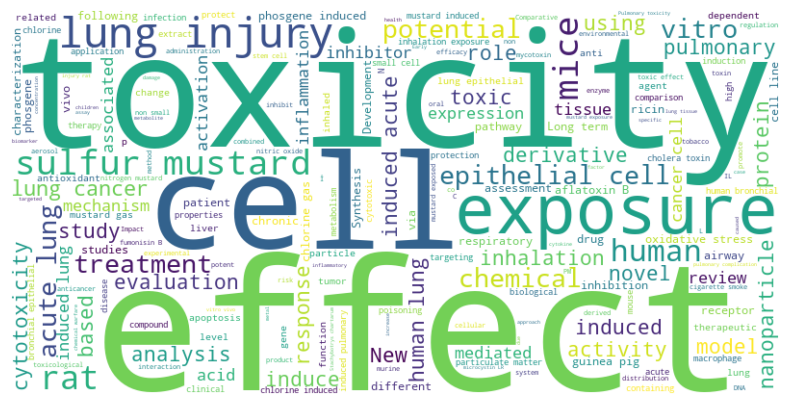

In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# 데이터프레임에서 모든 단어를 하나의 문자열로 합칩니다.
text = " ".join(data['Paper'])

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# 워드 클라우드를 플롯합니다.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
words = " ".join(data['Paper']).split()

word_counts = Counter(words)

# 결과를 데이터프레임으로 변환합니다.
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])

# 결과를 CSV 파일로 저장
word_counts_df.to_csv('.csv', index=True)

In [57]:
lung = pd.read_csv("/Users/csb/Desktop/폐독성 모음/폐독성 자료조사 통합본.csv",encoding='utf-8')
lung2 = lung.iloc[:,:8]
lung2['Related_genes']

0                                  Foxf1 SMAD6 ETV6 LEF1
1                                                    NaN
2      \tSnai1 Hspa1b Irf3 Gm10778 Hspa1a Krt13 Krt4 ...
3                                                    NaN
4                  Fibronectin MMP-2 PAI-1 NLRP3 b-actin
                             ...                        
143    CYP2A6 CYP2A13 CYP2B6 Carbonylreductase1 11-bH...
144                                                  NaN
145                                                  NaN
146                                                  NaN
147                                                  NaN
Name: Related_genes, Length: 148, dtype: object

In [58]:
words = " ".join(map(str,lung2['Related_genes'])).split()

word_counts = Counter(words)

# 결과를 데이터프레임으로 변환합니다.
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])

# 결과를 CSV 파일로 저장
word_counts_df.to_csv('gene.csv', index=True)